In [39]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

import os

os.getcwd()
#import os.path

'/Users/taohuang/Downloads/2024_ID_WQ-main-18'

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [60]:
site  = "13176400"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3.columns)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

#print(station_nm)
print(df3[['alt_va', 'alt_meth_cd', 'alt_acy_va', 'drain_area_va', 'contrib_drain_area_va']])

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo_cd', 'instruments_cd', 'construction_dt',
       'inventory_dt', 'drain_area_va', 'contrib_drain_area_va', 'tz_cd',
       'local_time_fg', 'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd',
       'aqfr_cd', 'aqfr_type_cd', 'well_depth_va', 'hole_depth_va',
       'depth_src_cd', 'project_no'],
      dtype='object')
    alt_va alt_meth_cd  alt_acy_va  drain_area_va  contrib_drain_area_va
0  4253.65           Y        0.08           2140                    NaN


In [61]:
print(os.getcwd())
path=  r"data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,13190500,13018300, 13211205, 13337099
#13266000,
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400, 13310800, 13317660, 13192200, 12322000, 13139510,13341050

print(data)
print(data.columns)

/Users/taohuang/Downloads/2024_ID_WQ-main-18
      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0            152  2013-06-01       0.0               0.9               11.0   
1            153  2013-06-02       0.0               4.4               15.8   
2            154  2013-06-03       0.0               4.8               15.5   
3            155  2013-06-04       0.0               4.2               14.4   
4            156  2013-06-05       0.0               5.5               15.4   
...          ...         ...       ...               ...                ...   
1001        3850  2023-08-27       0.0              14.1               23.2   
1002        3851  2023-08-28       0.0              13.7               22.7   
1003        3852  2023-08-29       0.0              13.7               24.3   
1004        3853  2023-08-30       0.0              10.0               20.8   
1005        3854  2023-08-31       0.0               4.7               14.5   

      

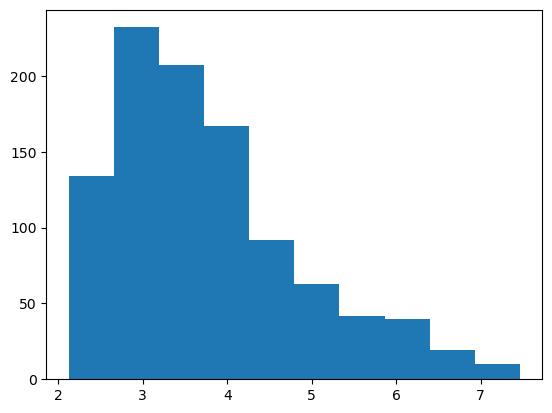

(array([882.,  56.,  25.,  25.,   5.,   3.,   4.,   1.,   3.,   2.]),
 array([   8.38 ,  181.542,  354.704,  527.866,  701.028,  874.19 ,
        1047.352, 1220.514, 1393.676, 1566.838, 1740.   ]),
 <BarContainer object of 10 artists>)

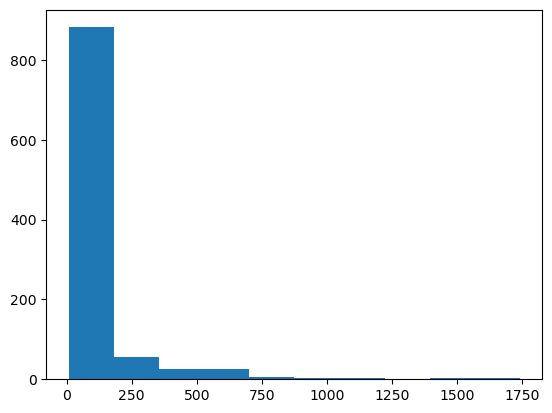

In [62]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

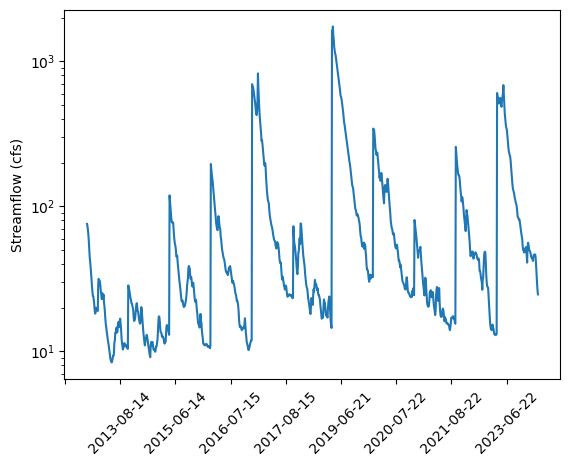

In [63]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

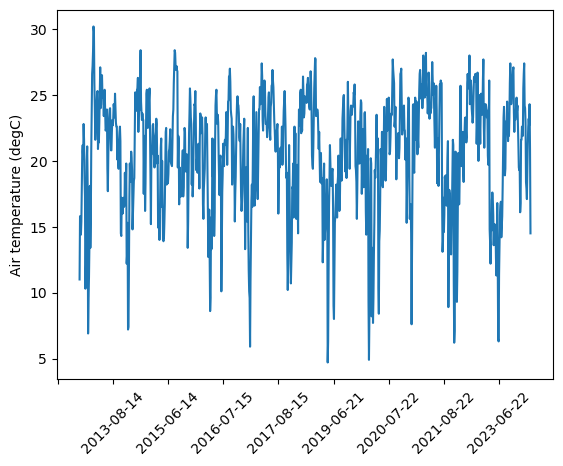

In [64]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

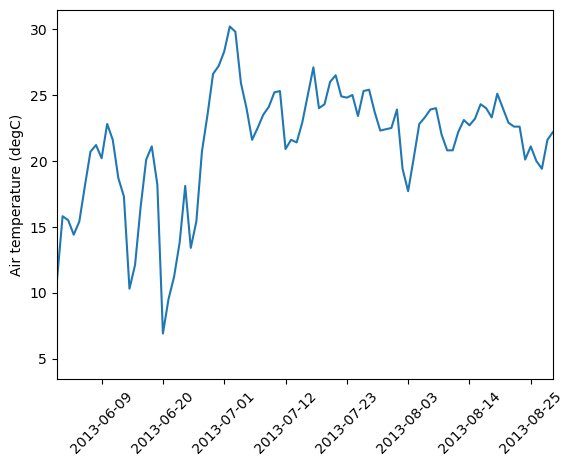

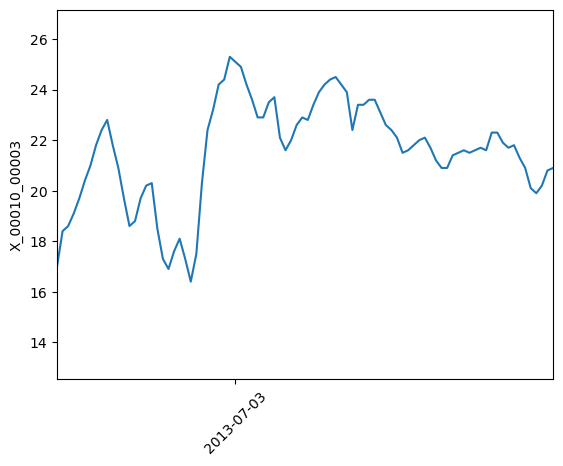

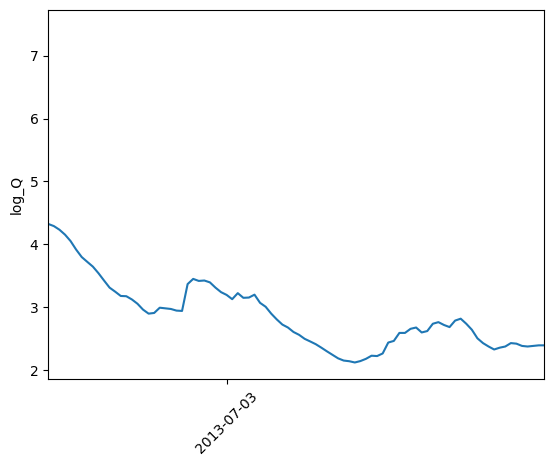

In [65]:
start=0
end=89

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

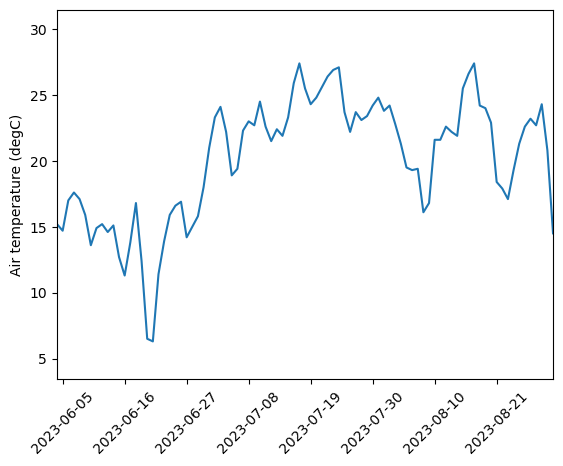

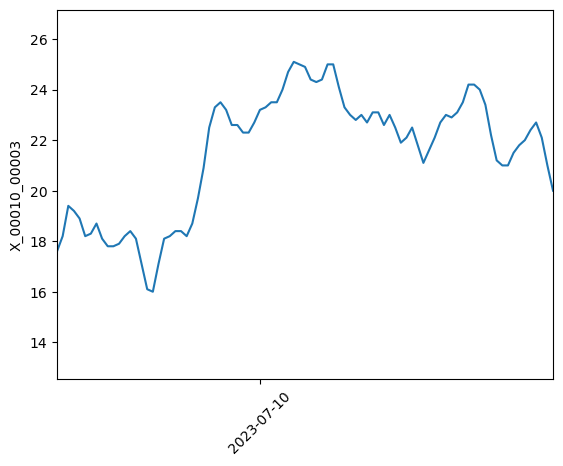

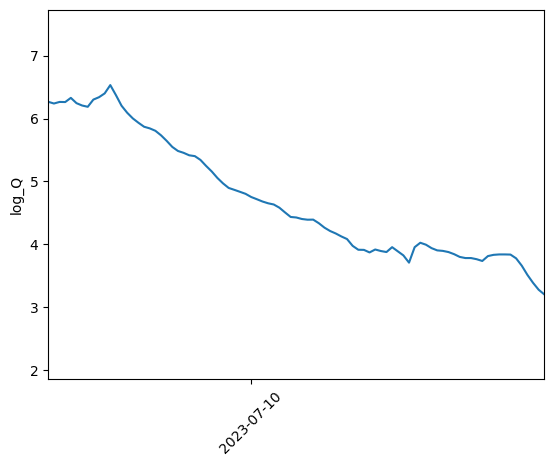

In [66]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

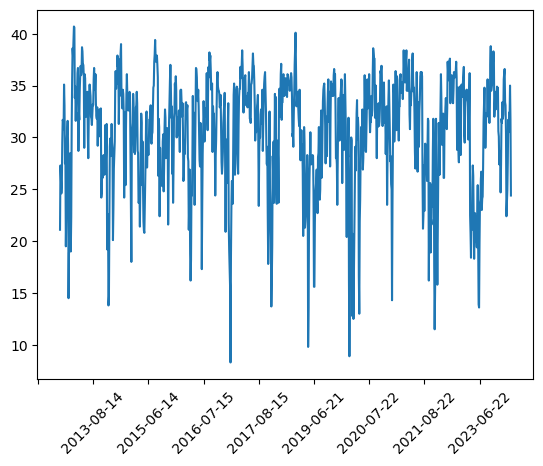

In [67]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

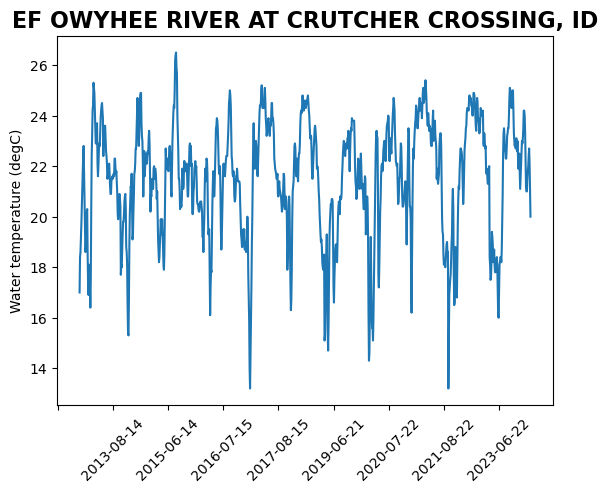

In [68]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

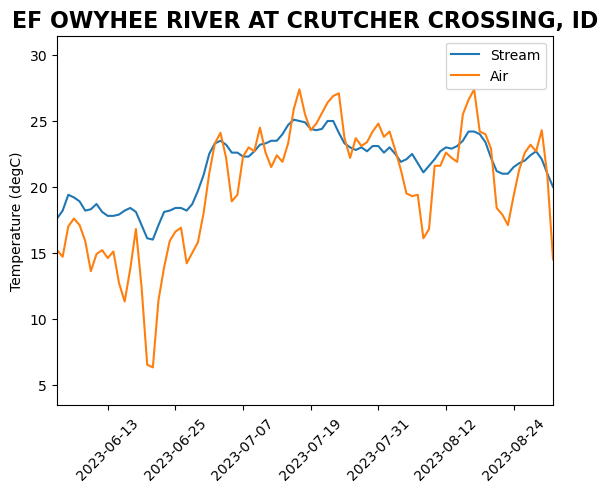

In [69]:
start=len(data)-89
end=len(data)-1



plt.plot(data['Date'] , data[ 'X_00010_00003'] , label='Stream' )
plt.plot(data['Date'] , data[ 'tmean..degrees.C.']  , label='Air')
plt.xlim(  data['Date'][ start],  data['Date'][ end])

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=12))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

plt.ylabel("Temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

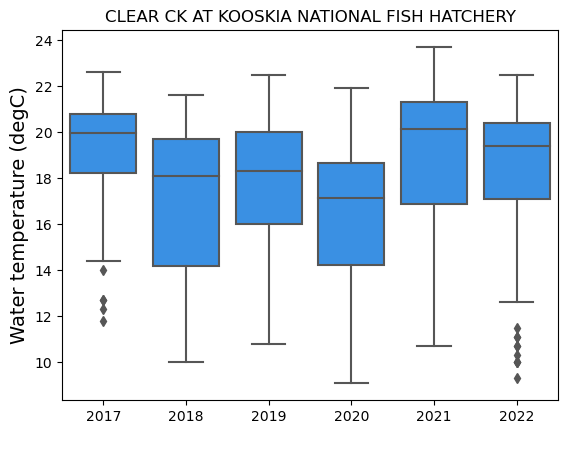

In [12]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")


import seaborn as sns



ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

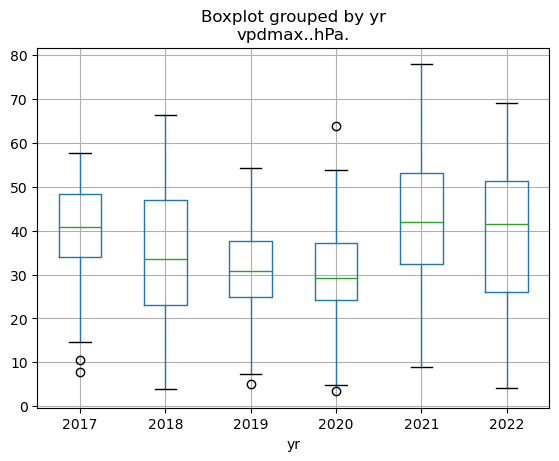

In [13]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

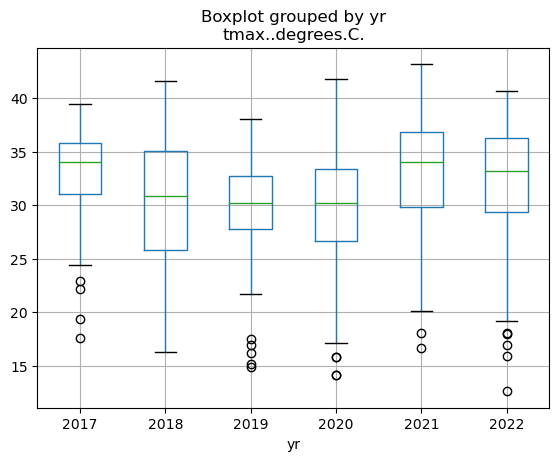

In [14]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

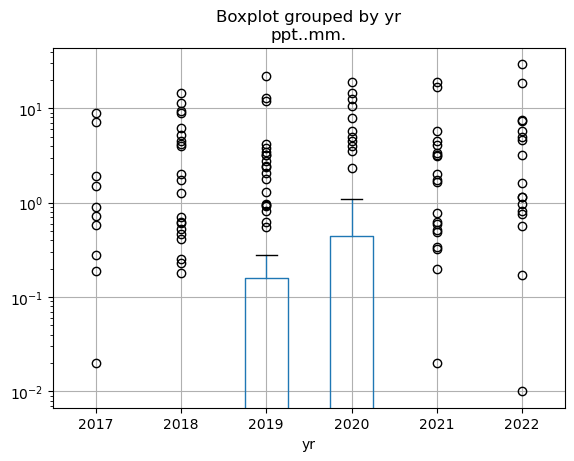

In [15]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

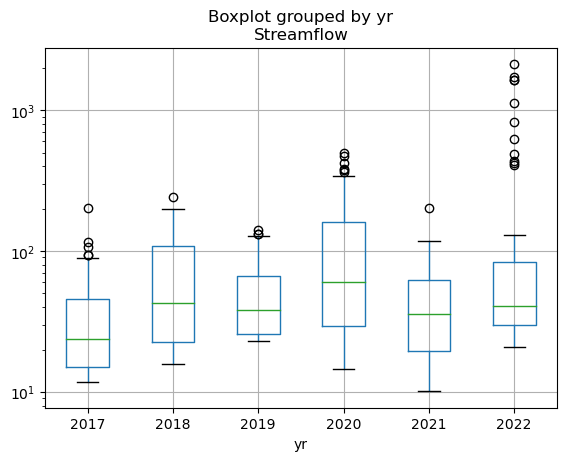

In [16]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [17]:
#data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

                   ppt..mm.  tmean..degrees.C.  X_00010_00003  X_00060_00003  \
ppt..mm.           1.000000          -0.398485      -0.389841       0.490268   
tmean..degrees.C. -0.398485           1.000000       0.856519      -0.375834   
X_00010_00003     -0.389841           0.856519       1.000000      -0.512908   
X_00060_00003      0.490268          -0.375834      -0.512908       1.000000   
doy               -0.197617           0.395550       0.617390      -0.380736   
log_Q              0.404093          -0.529391      -0.776544       0.704263   

                        doy     log_Q  
ppt..mm.          -0.197617  0.404093  
tmean..degrees.C.  0.395550 -0.529391  
X_00010_00003      0.617390 -0.776544  
X_00060_00003     -0.380736  0.704263  
doy                1.000000 -0.817281  
log_Q             -0.817281  1.000000  


<Axes: >

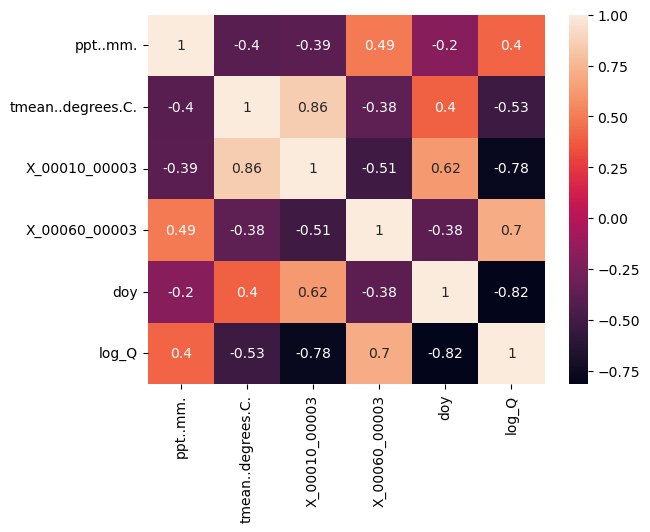

In [18]:
all_idv=[ 'ppt..mm.' 
    # , 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
    #  'vpdmin..hPa.', 
    # 'vpdmax..hPa.', 
   #     'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003'# ,#   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.           1.000000          -0.398485     -0.442024  0.404093
tmean..degrees.C. -0.398485           1.000000      0.904617 -0.529391
vpdmax..hPa.      -0.442024           0.904617      1.000000 -0.550024
log_Q              0.404093          -0.529391     -0.550024  1.000000


<Axes: >

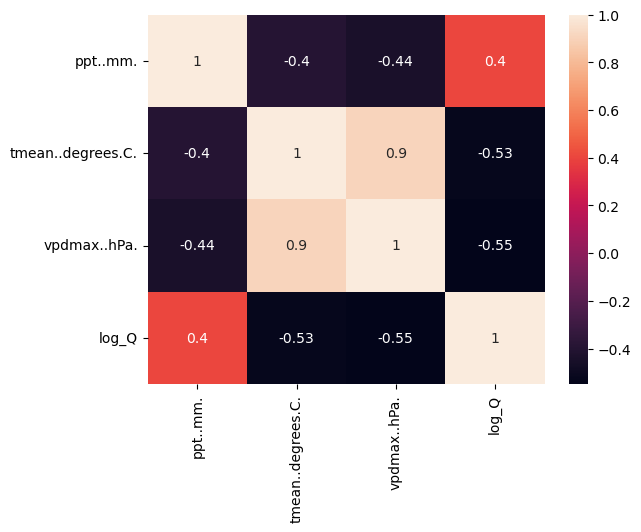

In [19]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [20]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
386      0.00               22.9         27.36  3.490429
19       0.00               22.8         35.69  3.848018
322      0.00               28.6         53.87  3.165475
332      0.00               20.9         38.44  2.747271
56       0.00               24.0         42.58  2.721295
..        ...                ...           ...       ...
106      0.25               17.9         19.25  4.412798
270      0.46               23.0         35.86  5.003946
348      0.49               19.0         22.93  4.525044
435      0.00               18.5         18.92  6.428105
102      0.00               21.0         27.86  4.753590

[400 rows x 4 columns]
386    20.6
19     19.6
322    21.8
332    17.5
56     20.5
       ... 
106    15.7
270    16.3
348    15.1
435    11.1
102    14.6
Name: X_00010_00003, Length: 400, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='object')


In [21]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0      11.8
1      12.3
2      12.7
3      12.7
4      14.0
       ... 
331    19.1
332    17.5
333    17.5
334    16.7
335    14.9
Name: X_00010_00003, Length: 336, dtype: float64


In [22]:
print(X_train)

X_train=X_train[[ #'ppt..mm.',
    'tmean..degrees.C.'#, 'vpdmax..hPa.'
    , 'log_Q']]
X_test= X_test[[ #'ppt..mm.',
    'tmean..degrees.C.'#, 'vpdmax..hPa.'
    , 'log_Q']]

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q    yr
0        1.50               20.4         24.66  5.313206  2017
1        0.00               12.6         10.44  4.541165  2017
2        0.00               15.0         19.13  4.498698  2017
3        8.82               16.8         14.85  4.744932  2017
4        7.23               15.8          7.68  4.672829  2017
..        ...                ...           ...       ...   ...
331      0.00               22.5         34.94  2.944439  2020
332      0.00               20.9         38.44  2.747271  2020
333      0.00               20.4         36.71  2.681022  2020
334      0.00               20.4         37.13  2.714695  2020
335      0.45               18.3         26.18  2.760010  2020

[336 rows x 5 columns]


0.9419564849349461


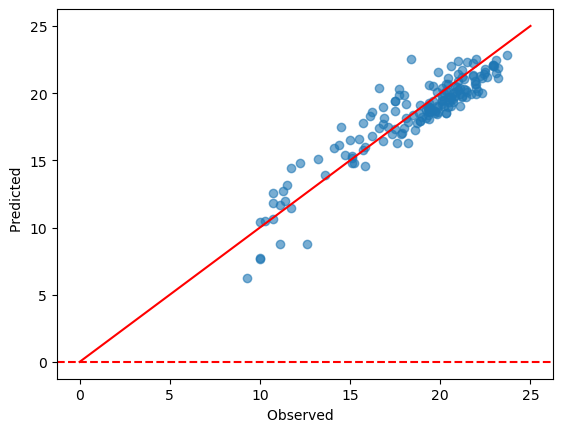

test: 0.9237122892992125
1.0838723849373146


In [23]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [24]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8346794068994816
test correlation_coefficient: 0.8296957683706234
MSE: 1.7425845993087354
RMS: 2.0796740652690944
max depth: 2
test correlation_coefficient: 0.9108239053588975
test correlation_coefficient: 0.9006210023349069
MSE: 1.2765196306105433
RMS: 1.6053838153539297
max depth: 3
test correlation_coefficient: 0.9424546131785743
test correlation_coefficient: 0.9337168173881659
MSE: 1.0181206577411086
RMS: 1.2853139187635474
max depth: 4
test correlation_coefficient: 0.9602176707055354
test correlation_coefficient: 0.9452425730890381
MSE: 0.9324175805937309
RMS: 1.1812140072899904
max depth: 5
test correlation_coefficient: 0.9709274652166405
test correlation_coefficient: 0.941008385315871
MSE: 0.8953895783982254
RMS: 1.1757963714234698
max depth: 6
test correlation_coefficient: 0.9785351323100651
test correlation_coefficient: 0.9382654792602506
MSE: 0.9368686407331022
RMS: 1.2020587378602983
max depth: 7
test correlation_coefficient: 0.98

max depth: 5
correlation_coefficient: 0.941008385315871
MSE: 0.8953895783982254
RMS: 1.1757963714234698


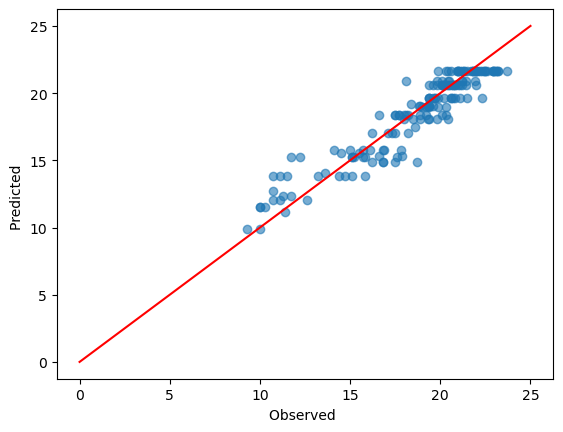

In [25]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [26]:
print(regr.feature_importances_)
print(idv)

[0.20775324 0.79224676]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [27]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [28]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.4730


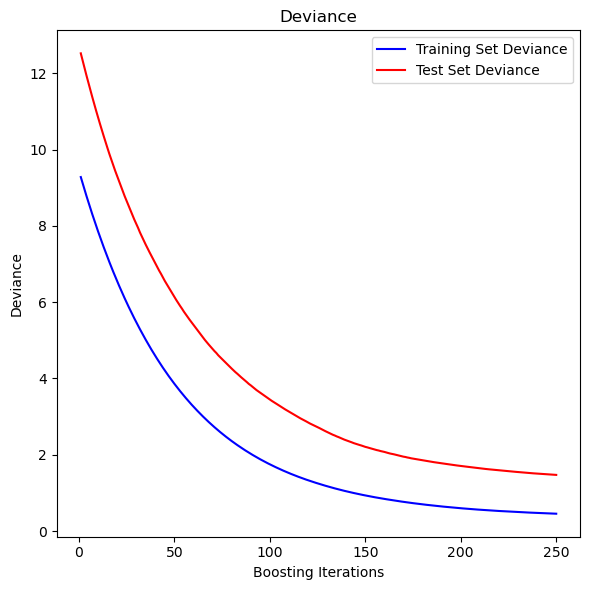

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

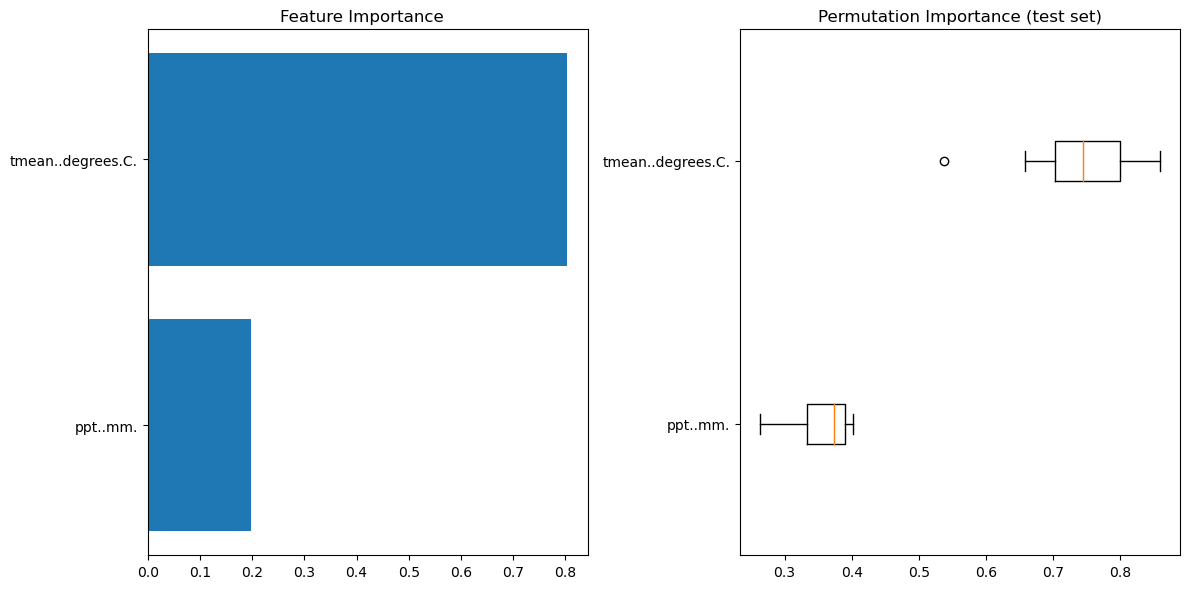

In [30]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [32]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    print(X.columns[perm_sorted_idx][3])

    
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax


The plot on the left shows the Gini importance of the model. 

permuting a feature

In [33]:



#mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
#tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
#tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
#mdi_importances.sort_values().plot.barh(ax=ax1)
#ax1.set_xlabel("Gini importance")
#plot_permutation_importance(reg, X_train, y_train, ax2)
#ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(    "Impurity-based vs. permutation importances on multicollinear features (train set)")
#_ = fig.tight_layout()

correlation_coefficient: 0.9523998198192948
MSE: 0.9497267672964089
RMS: 1.2136543835690152


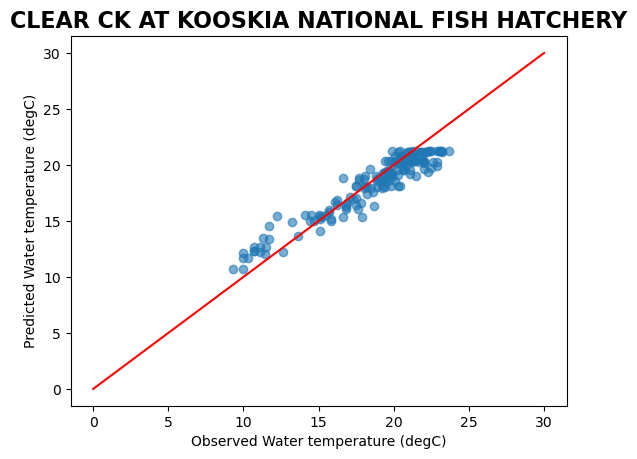

In [34]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

336    13.2
337    14.4
338    14.5
339    15.7
340    14.1
       ... 
496    19.4
497    18.1
498    18.2
499    18.9
500    19.6
Name: X_00010_00003, Length: 165, dtype: float64
[14.8750128  14.98925814 15.49134151 15.79841293 15.53892321 14.57302289
 13.4030996  13.49173157 15.45950664 12.34024909 12.0444179  13.69392488
 15.17939186 16.61744844 16.65433739 15.45950664 15.33755302 15.94008224
 16.83517786 16.92656429 17.92325016 17.9536268  18.97088617 18.02022723
 18.08815641 18.0850088  19.21587488 19.63985512 19.69473664 19.90132814
 20.24444536 20.24444536 20.24444536 20.2288947  20.28768326 20.46864555
 20.93713838 20.34741699 20.27633765 20.29093827 20.36201762 20.36201762
 20.36201762 21.1609758  21.18756189 20.29093827 19.53844614 19.53844614
 20.78882471 20.36201762 19.54541689 19.30904756 18.63053383 18.87880849
 19.68070019 20.80647086 20.38292033 21.26385277 21.26385277 21.20724916
 21.20724916 21.26385277 21.18756189 21.26385277 21.20724916 21.20724916
 20.48165105 19.

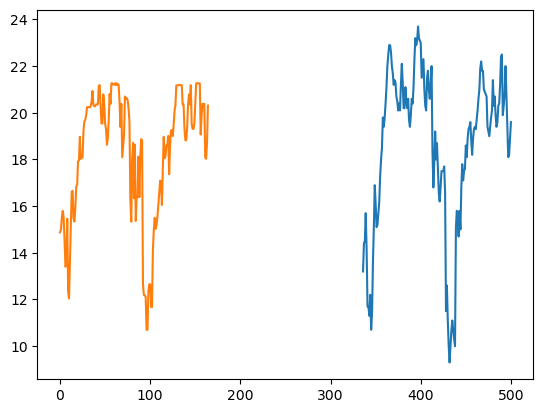

336    2021-06-01
337    2021-06-02
338    2021-06-03
339    2021-06-04
340    2021-06-05
          ...    
496    2022-08-27
497    2022-08-28
498    2022-08-29
499    2022-08-30
500    2022-08-31
Name: Date, Length: 165, dtype: object


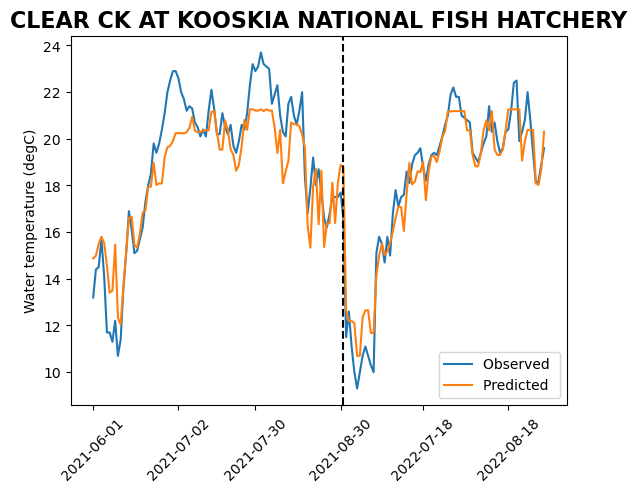

In [35]:
print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2021-08-31", color='black', linestyle='--')
#plt.axvline(x= "2022-06-01", color='black', linestyle='--')
#plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [36]:
X_test2021= X[X['yr']==2021 ]
X_test2021=X_test2021[['tmean..degrees.C.','log_Q']]
print(X_test2021)
input2=  data[  idv3]
Y=input2[idv3]


y_test2021=Y[Y['yr']==2021][  'X_00010_00003']
y_test2021

     tmean..degrees.C.     log_Q
336               19.4  4.770685
337               21.6  4.744932
338               24.4  4.709530
339               24.8  4.663439
340               20.4  4.578826
..                 ...       ...
423               19.5  2.415914
424               18.0  2.433613
425               19.4  2.388763
426               21.3  2.370244
427               21.2  2.312535

[92 rows x 2 columns]


336    13.2
337    14.4
338    14.5
339    15.7
340    14.1
       ... 
423    17.5
424    17.5
425    17.5
426    17.7
427    16.6
Name: X_00010_00003, Length: 92, dtype: float64

In [37]:
print(X_test)
yfit2021 = regr.predict( X_test2021 )

correlation_coefficient2021 = np.corrcoef(y_test2021 , yfit2021)[0, 1]
rms2021 = mean_squared_error(y_test2021 , yfit2021, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient2021)
print("MSE:", mean_absolute_error( y_test2021 , yfit2021 ) )
print("RMS2021:",rms2021)

     tmean..degrees.C.     log_Q
336               19.4  4.770685
337               21.6  4.744932
338               24.4  4.709530
339               24.8  4.663439
340               20.4  4.578826
..                 ...       ...
496               24.9  3.126761
497               19.5  3.109061
498               18.9  3.095578
499               21.5  3.068053
500               24.5  3.044522

[165 rows x 2 columns]
correlation_coefficient: 0.9342843367517984
MSE: 1.1451251604452914
RMS2021: 1.425859193606202


In [38]:
max_bias=max(yfit-y_test)
max_bias

3.259506638387913

In [39]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

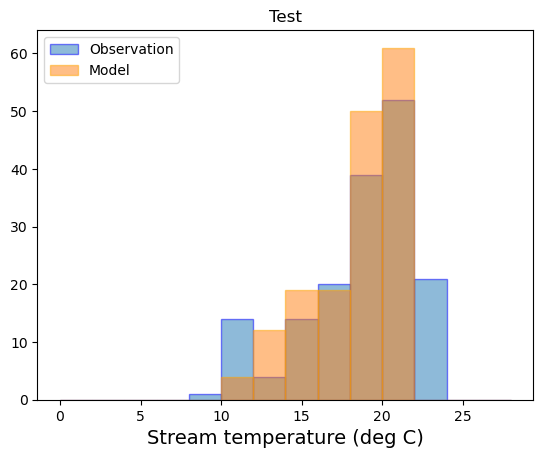

In [40]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [41]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [42]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.9357479357176159
MSE: 1.114190996462849
RMS: 1.4112796288037799


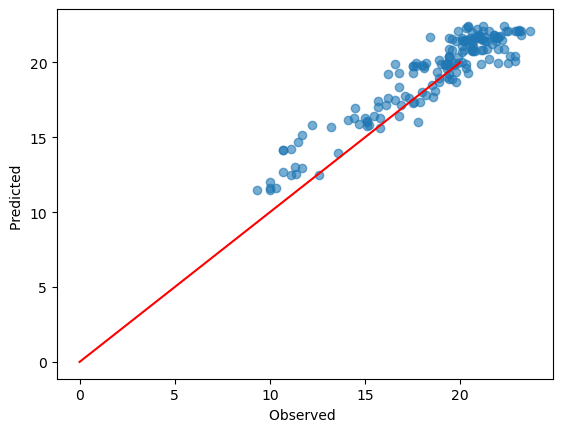

In [43]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.9428866733856877
MSE: 1.6335229860137768
RMS: 1.9181348581819886


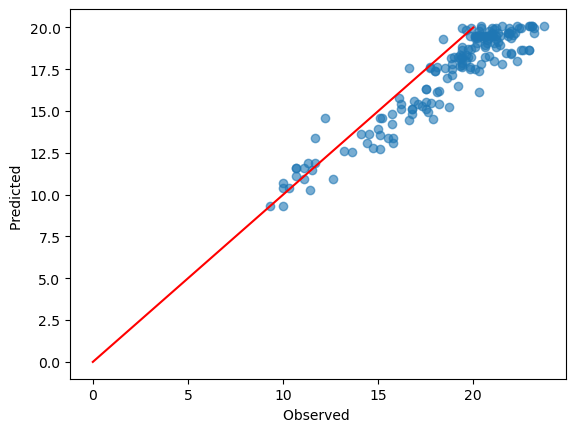

In [44]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [45]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.9523998198192948
MSE: 0.9497267672964089
RMS: 1.2136543835690152


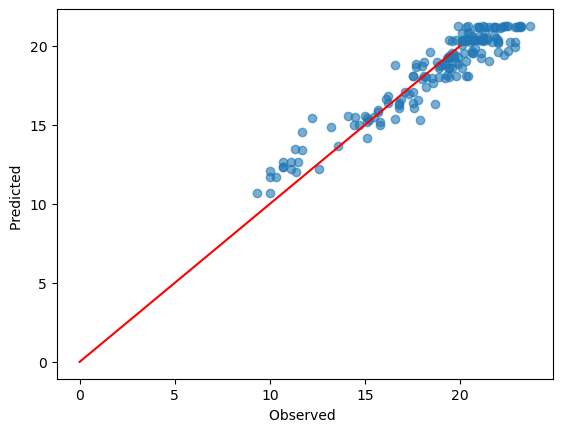

In [46]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [47]:
perm=""
data = {
    
    "site"  : [ site],
'alt_va': [ alt_va],
    'drain_area_va': [ drain_area_va],
    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
    "rms2021": [rms2021],
        "correlation_coefficient": [correlation_coefficient],
    "perm":[perm]
       }
result = pd.DataFrame(data)
print(result)

       site   alt_va  drain_area_va  \
0  13337099  1302.02            NaN   

                                   station_nm  dec_lat_va  dec_long_va  \
0  CLEAR CK AT KOOSKIA NATIONAL FISH HATCHERY   46.130053  -115.948131   

   max_bias       RMS   rms2021  correlation_coefficient perm  
0  3.259507  1.213654  1.425859                   0.9524       


In [48]:
file= "result"+site+".csv"
file
result.to_csv(file)

In [49]:
#perm="tmean..degrees.C."
#perm="log_Q"
#perm="tmean..degrees.C."
#perm="tmean..degrees.C. & log_Q"

